**IMPORTING DEPENDENCIES**

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [252]:
data=('/content/collegePlace.csv')
data=pd.read_csv(data)

**DATA PRE-PROCESSING**

In [253]:
data
data.head(10)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
5,22,Male,Electronics And Communication,0,6,0,0,0
6,21,Male,Computer Science,0,7,0,1,0
7,21,Male,Information Technology,1,7,0,0,0
8,21,Male,Computer Science,2,6,0,0,1
9,21,Female,Computer Science,1,6,1,0,0


In [254]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


(2966, 8)

In [255]:
data.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [256]:
replacedata=data['Gender'].replace({'Male':0,'Female':1},inplace=True)
print(replacedata)

None


In [257]:
data.head(11)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,0,Electronics And Communication,1,8,1,1,1
1,21,1,Computer Science,0,7,1,1,1
2,22,1,Information Technology,1,6,0,0,1
3,21,0,Information Technology,0,8,0,1,1
4,22,0,Mechanical,0,8,1,0,1
5,22,0,Electronics And Communication,0,6,0,0,0
6,21,0,Computer Science,0,7,0,1,0
7,21,0,Information Technology,1,7,0,0,0
8,21,0,Computer Science,2,6,0,0,1
9,21,1,Computer Science,1,6,1,0,0


In [258]:
data['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [259]:
stream=data['Stream']
type(stream[1])

str

In [260]:
gender=data['Gender']
type(gender[1])

numpy.int64

In [261]:
data['Stream'].replace({'Electronics And Communication':0,'Computer Science':1,'Information Technology':2,'Mechanical':3,'Electrical':4, 'Civil':5},inplace=True)

In [262]:
age=data['Age']
stream=data['Stream']
internship=data['Internships']
cgpa=data['CGPA']
hostel=data['Hostel']
backlog=data['HistoryOfBacklogs']
y=data['PlacedOrNot']

In [263]:
x=data.drop(['PlacedOrNot'],axis=1)
y=data['PlacedOrNot']

**CHECKING WHETHER THE DATA IS IMBALANCE OR NOT**

In [264]:
target_column = 'PlacedOrNot'
# Calculate the class distribution
class_distribution = data[target_column].value_counts()
print("Class Distribution:")
print(class_distribution)
class_percentage = class_distribution / class_distribution.sum() * 100
print("Class Percentage:")
print(class_percentage)

Class Distribution:
1    1639
0    1327
Name: PlacedOrNot, dtype: int64
Class Percentage:
1    55.259609
0    44.740391
Name: PlacedOrNot, dtype: float64


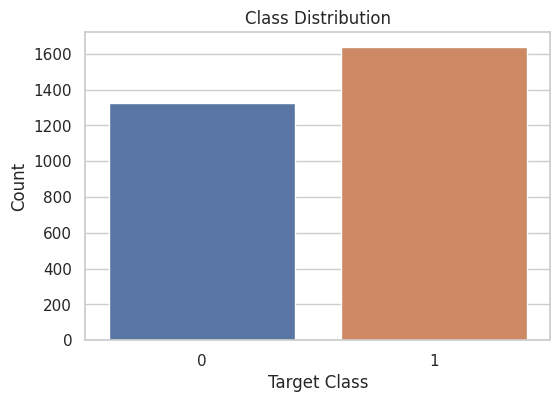

In [265]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
# Assuming class_distribution is calculated as shown above
sns.countplot(x=target_column, data=data)
plt.title("Class Distribution")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.show()

**TRAINING AND TESTING ,SPILTTING**

In [266]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state=30)

**USING SMOTE FOR IMBALANCE -> BALANCE**

In [267]:
smote = SMOTE(random_state=42)
# Perform SMOTE on the training data
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

**GRAPH AFTER USING SMOTE**

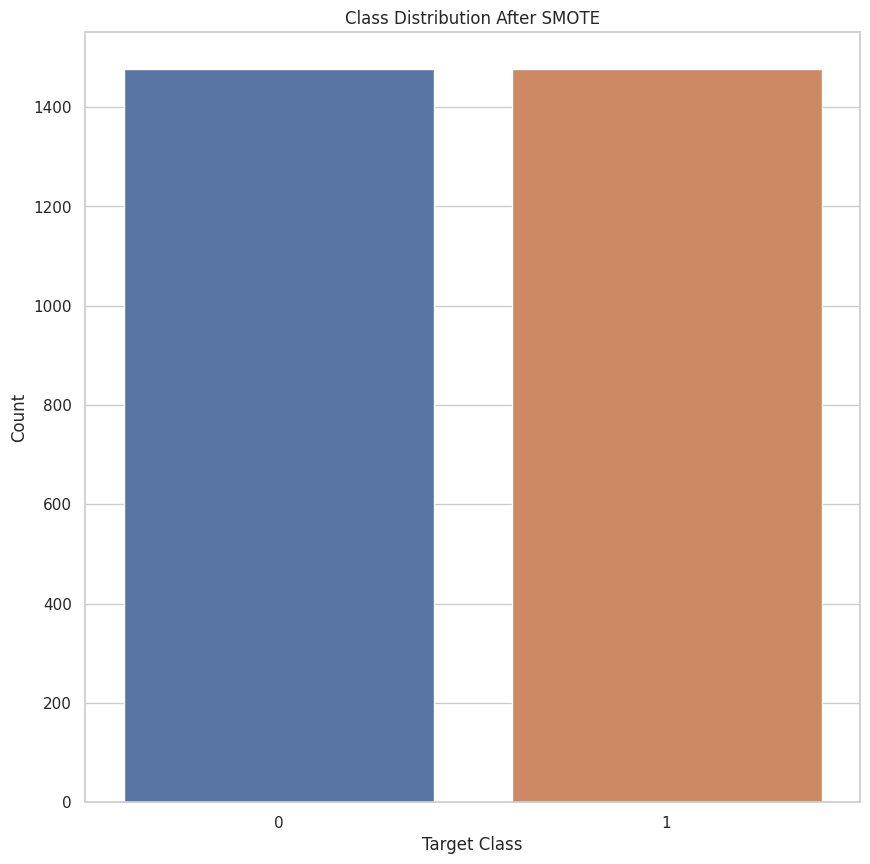

In [268]:
class_distribution_after = y_train_resampled.value_counts()
plt.figure(figsize=(10, 10))
sns.barplot(x=class_distribution_after.index, y=class_distribution_after.values)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.show()

In [269]:
modelxgb=XGBClassifier(learning_rate=0.08,n_estimators=100)

In [270]:
modelxgb.fit(x_train_resampled, y_train_resampled,eval_metric='logloss')

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [271]:
y_pred=modelxgb.predict(x_train_resampled)

In [272]:
print("XGB Accuracy_score->" + str(accuracy_score(y_pred,y_train_resampled)))

XGB Accuracy_score->0.9119837508463101


In [273]:
xgbcr=classification_report(y_train_resampled,y_pred)
print("classification report",xgbcr)


classification report               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1477
           1       0.98      0.84      0.91      1477

    accuracy                           0.91      2954
   macro avg       0.92      0.91      0.91      2954
weighted avg       0.92      0.91      0.91      2954



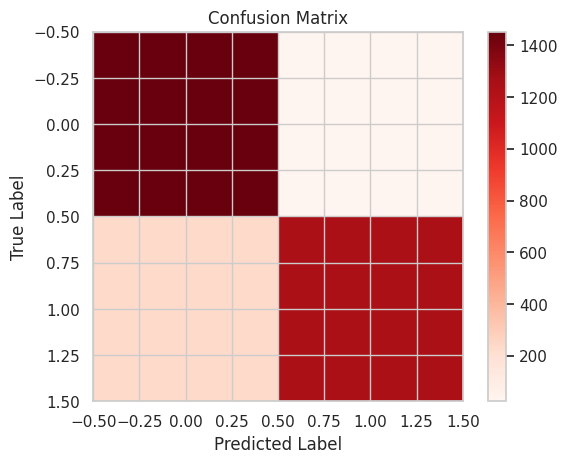

In [274]:
xgbcm=confusion_matrix(y_train_resampled,y_pred)
plt.imshow(xgbcm, cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [275]:
modelrf=RandomForestClassifier(n_estimators=100, random_state=30)
modelrf.fit(x_train_resampled, y_train_resampled)
predrf=modelrf.predict(x_train_resampled)

In [276]:
print("RF Accuracy_score: " + str(accuracy_score(predrf,y_train_resampled)))
RFcr=classification_report(y_train_resampled,predrf)
print("RF classification report ",RFcr)

RF Accuracy_score: 0.9292484766418416
RF classification report                precision    recall  f1-score   support

           0       0.90      0.97      0.93      1477
           1       0.97      0.89      0.93      1477

    accuracy                           0.93      2954
   macro avg       0.93      0.93      0.93      2954
weighted avg       0.93      0.93      0.93      2954



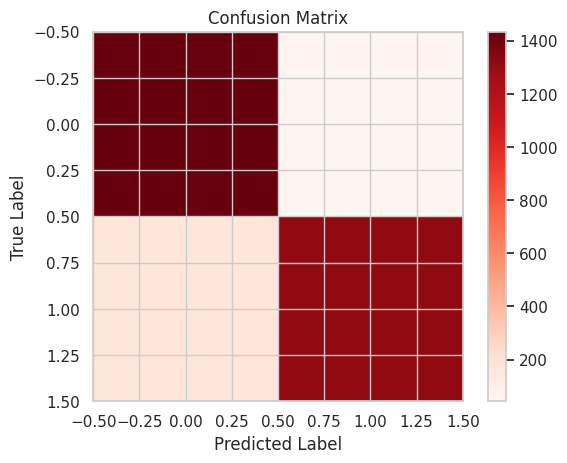

In [277]:
RFcm=confusion_matrix(y_train_resampled,predrf)
plt.imshow(RFcm, cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**USING ENSEMBLE**

In [278]:
 # Use 'soft' for probabilities-based voting, or 'hard' for majority voting
ensclf = VotingClassifier(estimators=[('random_forest', modelrf), ('xgboost', modelxgb)],voting='hard')
# Train the ensemble classifier
ensclf.fit(x_train_resampled, y_train_resampled)
# Make predictions using the ensemble classifier
enspred = ensclf.predict(x_test)
# Evaluate the ensemble's performance
ens_acc = accuracy_score(y_test, enspred)
print("ACCURACY->",ens_acc)
enscr=classification_report(y_test,enspred)
print("ENS classification report ",enscr)

ACCURACY-> 0.8720538720538721
ENS classification report                precision    recall  f1-score   support

           0       0.79      0.97      0.87       135
           1       0.97      0.79      0.87       162

    accuracy                           0.87       297
   macro avg       0.88      0.88      0.87       297
weighted avg       0.89      0.87      0.87       297

